In [3]:
import numpy as np
import pandas as pd

In [4]:
data = pd.read_csv('beer_reviews.csv')
pd.options.display.max_rows = 8
data

brewery_id                 brewery_name  review_time  review_overall  \
0             10325              Vecchio Birraio   1234817823             1.5   
1             10325              Vecchio Birraio   1235915097             3.0   
2             10325              Vecchio Birraio   1235916604             3.0   
3             10325              Vecchio Birraio   1234725145             3.0   
...             ...                          ...          ...             ...   
1586610       14359  The Defiant Brewing Company   1161048566             4.0   
1586611       14359  The Defiant Brewing Company   1160702513             4.5   
1586612       14359  The Defiant Brewing Company   1160023044             4.0   
1586613       14359  The Defiant Brewing Company   1160005319             5.0   

         review_aroma  review_appearance review_profilename  \
0                 2.0                2.5            stcules   
1                 2.5                3.0            stcules   
2                 2.5                3.0            stcules   
3                 3.0                3.5            stcules   
...               ...                ...                ...   
1586610           5.0                2.5          yelterdow   
1586611           3.5                3.0           TongoRad   
1586612           4.5                4.5           dherling   
1586613           4.5                4.5               cbl2   

                     beer_style  review_palate  review_taste  \
0                    Hefeweizen            1.5           1.5   
1            English Strong Ale            3.0           3.0   
2        Foreign / Export Stout            3.0           3.0   
3               German Pilsener            2.5           3.0   
...                         ...            ...           ...   
1586610             Pumpkin Ale            2.0           4.0   
1586611             Pumpkin Ale            3.5           4.0   
1586612             Pumpkin Ale            4.5           4.5   
1586613             Pumpkin Ale            4.5           4.5   

                      beer_name  beer_abv  beer_beerid  
0                  Sausa Weizen       5.0        47986  
1                      Red Moon       6.2        48213  
2        Black Horse Black Beer       6.5        48215  
3                    Sausa Pils       5.0        47969  
...                         ...       ...          ...  
1586610      The Horseman's Ale       5.2        33061  
1586611      The Horseman's Ale       5.2        33061  
1586612      The Horseman's Ale       5.2        33061  
1586613      The Horseman's Ale       5.2        33061  

[1586614 rows x 13 columns]

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
reviews = data[['beer_beerid', 'beer_style', 'review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste']]
reviews

beer_beerid              beer_style  review_overall  review_aroma  \
0              47986              Hefeweizen             1.5           2.0   
1              48213      English Strong Ale             3.0           2.5   
2              48215  Foreign / Export Stout             3.0           2.5   
3              47969         German Pilsener             3.0           3.0   
...              ...                     ...             ...           ...   
1586610        33061             Pumpkin Ale             4.0           5.0   
1586611        33061             Pumpkin Ale             4.5           3.5   
1586612        33061             Pumpkin Ale             4.0           4.5   
1586613        33061             Pumpkin Ale             5.0           4.5   

         review_appearance  review_palate  review_taste  
0                      2.5            1.5           1.5  
1                      3.0            3.0           3.0  
2                      3.0            3.0           3.0  
3                      3.5            2.5           3.0  
...                    ...            ...           ...  
1586610                2.5            2.0           4.0  
1586611                3.0            3.5           4.0  
1586612                4.5            4.5           4.5  
1586613                4.5            4.5           4.5  

[1586614 rows x 7 columns]

In [7]:
# 2. Plot the distribution of number of reviews in each style
reviews_by_style = reviews.groupby('beer_style')
reviews_by_style.size()

beer_style
Altbier                        7741
American Adjunct Lager        30749
American Amber / Red Ale      45751
American Amber / Red Lager     9311
                              ...  
Weizenbock                     9412
Wheatwine                      3714
Winter Warmer                 20661
Witbier                       30140
Length: 104, dtype: int64

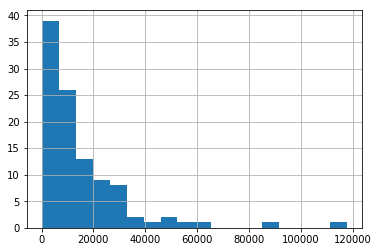

In [8]:
n_reviews = reviews_by_style.size()
plt.hist(n_reviews, bins='auto')
plt.grid()
plt.show()

In [9]:
highest = n_reviews.sort_values(ascending=False)
highest

beer_style
American IPA                      117586
American Double / Imperial IPA     85977
American Pale Ale (APA)            63469
Russian Imperial Stout             54129
                                   ...  
Faro                                 609
Roggenbier                           466
Kvass                                297
Happoshu                             241
Length: 104, dtype: int64

In [10]:
# 3 task - first approach
def calculate_score(group):
    aroma = group['review_aroma'].aggregate('mean')
    appearance = group['review_appearance'].aggregate('mean')
    return (aroma + appearance) / 2

reviews.dropna()
groupped_by_beerid = reviews.groupby('beer_beerid')
beer_scores = groupped_by_beerid.apply(calculate_score)
beer_scores

beer_beerid
3        3.916667
4        3.875000
5        3.345519
6        3.676169
           ...   
77314    3.750000
77315    3.750000
77316    3.500000
77317    3.750000
Length: 66055, dtype: float64

In [11]:
# 3rd task - 2nd approach
beers_with_means = groupped_by_beerid[['review_aroma', 'review_appearance']].aggregate('mean')
beers_with_means['score'] = (beers_with_means['review_aroma'] + beers_with_means['review_appearance'])/2
beers_with_means

review_aroma  review_appearance     score
beer_beerid                                           
3                4.000000           3.833333  3.916667
4                3.800000           3.950000  3.875000
5                3.205189           3.485849  3.345519
6                3.515964           3.836374  3.676169
...                   ...                ...       ...
77314            3.500000           4.000000  3.750000
77315            4.500000           3.000000  3.750000
77316            3.500000           3.500000  3.500000
77317            3.500000           4.000000  3.750000

[66055 rows x 3 columns]

In [12]:
# 4. Calculate the average score for each style.
groupped_by_style = reviews.groupby('beer_style')
styles_with_means = groupped_by_style[['review_aroma', 'review_appearance']].aggregate('mean')
styles_with_means['totalscore'] = (styles_with_means['review_aroma'] + styles_with_means['review_appearance'])/2
styles_with_means

review_aroma  review_appearance  totalscore
beer_style                                                             
Altbier                         3.624015           3.809327    3.716671
American Adjunct Lager          2.480211           2.788546    2.634378
American Amber / Red Ale        3.627254           3.810190    3.718722
American Amber / Red Lager      3.213296           3.527494    3.370395
...                                  ...                ...         ...
Weizenbock                      4.044677           4.009297    4.026987
Wheatwine                       3.969036           3.907108    3.938072
Winter Warmer                   3.707178           3.844635    3.775906
Witbier                         3.640876           3.686695    3.663786

[104 rows x 3 columns]

In [13]:
# 5. 
# Mean value is sensitive to extreme values especially when the sample size is small.

In [29]:
# 6. Approach from classes
reviews_by_beer = reviews.groupby(['beer_beerid'])
beers_with_means = reviews_by_beer.agg({'review_aroma': 'mean', 'review_appearance': 'mean', 'beer_style': 'first'})
beers_with_means['score'] = (beers_with_means['review_aroma'] + beers_with_means['review_appearance'])/2
groupped_by_style = beers_with_means.groupby('beer_style')

#TODO: Plot this stuff (point 7)

In [15]:
beers = data[['beer_beerid', 'beer_style', 'beer_name']].drop_duplicates()
beers_by_style = beers.groupby('beer_style')
beers_by_style.size()

beer_style
Altbier                        553
American Adjunct Lager        1142
American Amber / Red Ale      2512
American Amber / Red Lager     360
                              ... 
Weizenbock                     311
Wheatwine                      123
Winter Warmer                  636
Witbier                       1252
Length: 104, dtype: int64

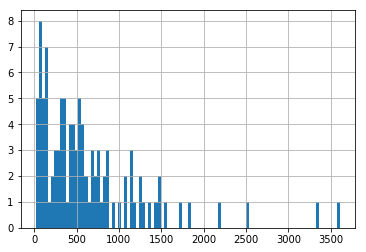

In [16]:
# 7. Plot the distribution of number of beers in each style.
plt.hist(beers_by_style.size(), bins=100)
plt.grid()
plt.show()

In [47]:
beers_by_style.size().sort_values(ascending=False)

beer_style
American IPA                       3611
American Pale Ale (APA)            3349
American Amber / Red Ale           2512
American Porter                    2198
                                   ... 
Gose                                 33
Sahti                                28
Bière de Champagne / Bière Brut      20
Faro                                 19
Length: 104, dtype: int64

In [40]:
#8. Choose the best styles using the same criterion as previously. Are the results the same?

#calc groups sizes
highest

beer_style
American IPA                      117586
American Double / Imperial IPA     85977
American Pale Ale (APA)            63469
Russian Imperial Stout             54129
                                   ...  
Faro                                 609
Roggenbier                           466
Kvass                                297
Happoshu                             241
Length: 104, dtype: int64

In [39]:
reviews_by_beer.size().sort_values(ascending=False)

beer_beerid
2093     3290
412      3111
1904     3000
1093     2728
         ... 
44366       1
44365       1
44364       1
40506       1
Length: 66055, dtype: int64

In [37]:
#compare results
beers_with_means

review_aroma          beer_style  review_appearance     score
beer_beerid                                                               
3                4.000000        American IPA           3.833333  3.916667
4                3.800000      American Stout           3.950000  3.875000
5                3.205189        Vienna Lager           3.485849  3.345519
6                3.515964   English Brown Ale           3.836374  3.676169
...                   ...                 ...                ...       ...
77314            3.500000  American Brown Ale           4.000000  3.750000
77315            4.500000             Witbier           3.000000  3.750000
77316            3.500000        American IPA           3.500000  3.500000
77317            3.500000    Quadrupel (Quad)           4.000000  3.750000

[66055 rows x 4 columns]

In [36]:
groupped_by_style.describe()

review_appearance                            \
                                       count      mean       std   min   
beer_style                                                               
Altbier                                553.0  3.795186  0.383654  2.00   
American Adjunct Lager                1142.0  2.857320  0.574933  1.00   
American Amber / Red Ale              2512.0  3.676954  0.445573  1.00   
American Amber / Red Lager             360.0  3.526607  0.496655  1.50   
...                                      ...       ...       ...   ...   
Weizenbock                             311.0  3.790213  0.446574  1.50   
Wheatwine                              123.0  3.923091  0.367687  2.00   
Winter Warmer                          636.0  3.778795  0.382709  2.00   
Witbier                               1252.0  3.584625  0.471526  1.25   

                                                            review_aroma  \
                               25%       50%       75%  max        count   
beer_style                                                                 
Altbier                     3.5000  3.886364  4.000000  5.0        553.0   
American Adjunct Lager      2.5000  2.900262  3.214286  4.5       1142.0   
American Amber / Red Ale    3.5000  3.736397  4.000000  5.0       2512.0   
American Amber / Red Lager  3.2500  3.500000  3.875000  5.0        360.0   
...                            ...       ...       ...  ...          ...   
Weizenbock                  3.5000  3.941176  4.000000  5.0        311.0   
Wheatwine                   3.8231  4.000000  4.056250  5.0        123.0   
Winter Warmer               3.5000  3.833333  4.000000  5.0        636.0   
Witbier                     3.4000  3.625000  4.000000  5.0       1252.0   

                                      ...                    score            \
                                mean  ...         75%  max   count      mean   
beer_style                            ...                                      
Altbier                     3.569152  ...    4.000000  5.0   553.0  3.682169   
American Adjunct Lager      2.529035  ...    3.000000  4.5  1142.0  2.693178   
American Amber / Red Ale    3.443585  ...    3.770105  5.0  2512.0  3.560270   
American Amber / Red Lager  3.226749  ...    3.500000  4.5   360.0  3.376678   
...                              ...  ...         ...  ...     ...       ...   
Weizenbock                  3.830999  ...    4.048438  5.0   311.0  3.810606   
Wheatwine                   3.926575  ...    4.174242  5.0   123.0  3.924833   
Winter Warmer               3.681939  ...    4.000000  5.0   636.0  3.730367   
Witbier                     3.537160  ...    3.976739  5.0  1252.0  3.560893   

                                                                          \
                                 std   min       25%       50%       75%   
beer_style                                                                 
Altbier                     0.373907  2.00  3.500000  3.750000  3.972222   
American Adjunct Lager      0.549357  1.00  2.375000  2.750000  3.000000   
American Amber / Red Ale    0.427145  1.00  3.281143  3.583333  3.833333   
American Amber / Red Lager  0.452783  1.50  3.120419  3.454741  3.708333   
...                              ...   ...       ...       ...       ...   
Weizenbock                  0.404144  2.25  3.625000  3.888095  4.007660   
Wheatwine                   0.380068  2.00  3.750000  3.972403  4.135081   
Winter Warmer               0.355025  1.75  3.500000  3.750000  4.000000   
Witbier                     0.439742  1.25  3.327529  3.625000  3.833333   

                                   
                              max  
beer_style                         
Altbier                     4.750  
American Adjunct Lager      4.500  
American Amber / Red Ale    5.000  
American Amber / Red Lager  4.375  
...                           ...  
Weizenbock                  4.750  
Wheatwine                  

In [ ]:
#The results are slightly different. The first approach uses bigger groups 
# i.e. American IPA has 117586 reviews, while the second approach calculates the average per beer - 
# beer with the highest number of reviews has only 3290 reviews.

In [ ]:
#9. Which scenario you consider more suitable and why?
#The first scenario has more reviews to calculate the mean. 
#Mean is sensitive to extreme values especially when the sample is small